# [viz_data] - Visualiser les données + créer des cartes

## 1 - Import des modules

In [1]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib as mpl
import matplotlib.pyplot as plt
from pypalettes import load_cmap
from svgpath2mpl import parse_path
from svgpathtools import svg2paths
from highlight_text import fig_text, ax_text
from shapely.geometry import Point, shape, Polygon, LineString
from matplotlib.font_manager import FontProperties

## 2 - Préparation à la visualisation

### 2.1 - Import des données

In [2]:
data = gpd.read_file("Documents/geoDataScience/defi_carto_sapin_2024/data/data_sapin.geojson")
data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   dep-code-txt                   96 non-null     object  
 1   dep-nom                        96 non-null     object  
 2   sapin-nb-exploitation          96 non-null     float64 
 3   sapin-nb-hectare               96 non-null     float64 
 4   total-nb-expl                  96 non-null     int32   
 5   total-nb-ha                    96 non-null     float64 
 6   region_name                    96 non-null     object  
 7   sapin-nb-exploitation-is-null  96 non-null     bool    
 8   sapin-nb-hectare-is-null       96 non-null     bool    
 9   total-nb-ha-is-null            96 non-null     bool    
 10  geometry                       96 non-null     geometry
dtypes: bool(3), float64(3), geometry(1), int32(1), object(3)
memory usage: 6.0+ KB


In [3]:
to_centroid = data.geometry
print(f"La projection de mon jeux de données : {to_centroid.crs}")

La projection de mon jeux de données : EPSG:4326


In [4]:
# Calcul du centroid --> Afficher les données via matplotlib par point
data["centroid_point"] = to_centroid.centroid

/tmp/ipykernel_140/2557848975.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  data["centroid_point"] = to_centroid.centroid


In [5]:
data.head()

,dep-code-txt,dep-nom,sapin-nb-exploitation,sapin-nb-hectare,total-nb-expl,total-nb-ha,region_name,sapin-nb-exploitation-is-null,sapin-nb-hectare-is-null,total-nb-ha-is-null,geometry,centroid_point
0,02,Aisne,19.0,23.0,4413,493926.0,Hauts-de-France,False,False,False,"POLYGON ((3.1727 50.012, 3.1822 50.01234, 3.21...",POINT (3.55965 49.5611)
1,10,Aube,43.0,31.0,4846,374685.0,Grand Est,False,False,False,"POLYGON ((3.41479 48.39027, 3.42208 48.41334, ...",POINT (4.16151 48.30459)
2,14,Calvados,38.0,297.0,5181,372938.0,Normandie,False,False,False,"POLYGON ((-1.11962 49.35557, -1.11503 49.3624,...",POINT (-0.36354 49.0994)
3,15,Cantal,35.0,5.0,4632,341054.0,Auvergne-Rhône-Alpes,False,False,False,"POLYGON ((2.50841 45.4785, 2.52444 45.4807, 2....",POINT (2.66888 45.05124)
4,28,Eure-et-Loir,60.0,129.0,3564,446392.0,Centre-Val de Loire,False,False,False,"POLYGON ((0.81482 48.67016, 0.82767 48.68072, ...",POINT (1.36983 48.38818)


In [6]:
data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   dep-code-txt                   96 non-null     object  
 1   dep-nom                        96 non-null     object  
 2   sapin-nb-exploitation          96 non-null     float64 
 3   sapin-nb-hectare               96 non-null     float64 
 4   total-nb-expl                  96 non-null     int32   
 5   total-nb-ha                    96 non-null     float64 
 6   region_name                    96 non-null     object  
 7   sapin-nb-exploitation-is-null  96 non-null     bool    
 8   sapin-nb-hectare-is-null       96 non-null     bool    
 9   total-nb-ha-is-null            96 non-null     bool    
 10  geometry                       96 non-null     geometry
 11  centroid_point                 96 non-null     geometry
dtypes: bool(3), float64(3), geomet

### 2.2 - Analyse de la répartition 

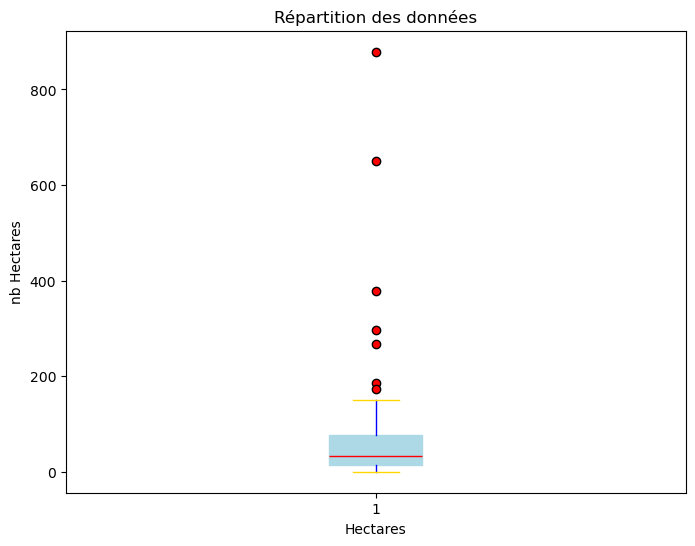

In [7]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(8,6))

# Create a boxplot for the desired column with custom colors
boxplot = ax.boxplot(
    data["sapin-nb-hectare"], 
    patch_artist=True,
)

# Set custom colors
box_color = 'lightblue'
whisker_color = 'blue'
cap_color = 'gold'
flier_color = 'red'
median_color = 'red'

# Add the right color for each part of the box
plt.setp(boxplot['boxes'], color=box_color)
plt.setp(boxplot['whiskers'], color=whisker_color)
plt.setp(boxplot['caps'], color=cap_color)
plt.setp(boxplot['fliers'], markerfacecolor=flier_color)
plt.setp(boxplot['medians'], color=median_color)

# Set labels and title
ax.set_xlabel('Hectares')
ax.set_ylabel('nb Hectares')
ax.set_title('Répartition des données')

# Show the plot
plt.show()

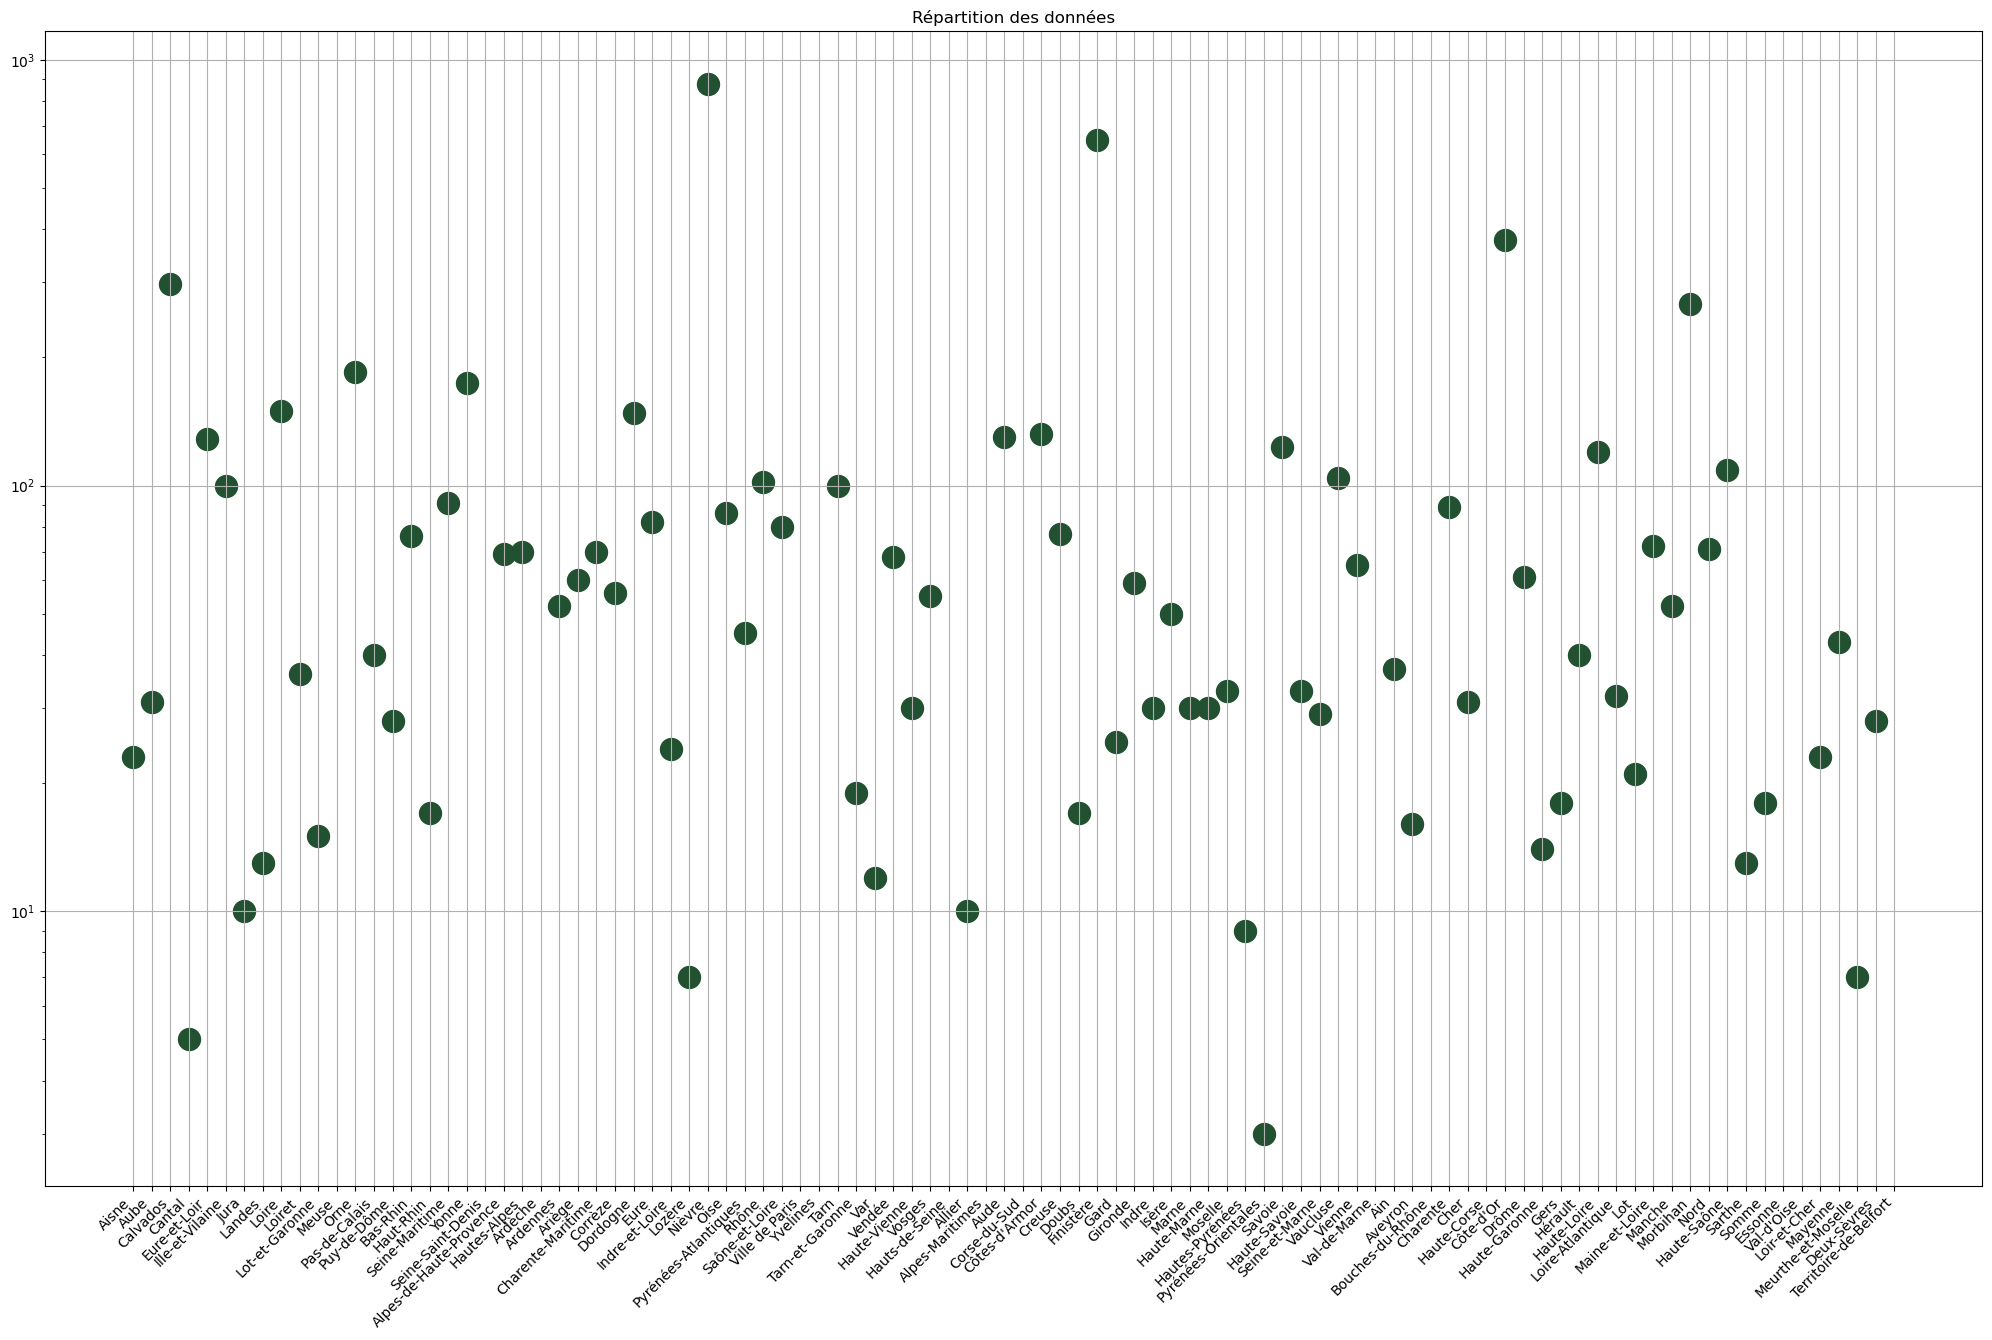

In [8]:
fig, ax = plt.subplots(figsize=(25, 15))
_ = ax.scatter(
    x=data["dep-nom"],
    y=data["sapin-nb-hectare"],
    color="#225131",
    s=500/2
    )
plt.xticks(rotation=45, ha='right')
plt.title("Répartition des données")
ax.set_yscale("log");
ax.grid(True)
plt.show()


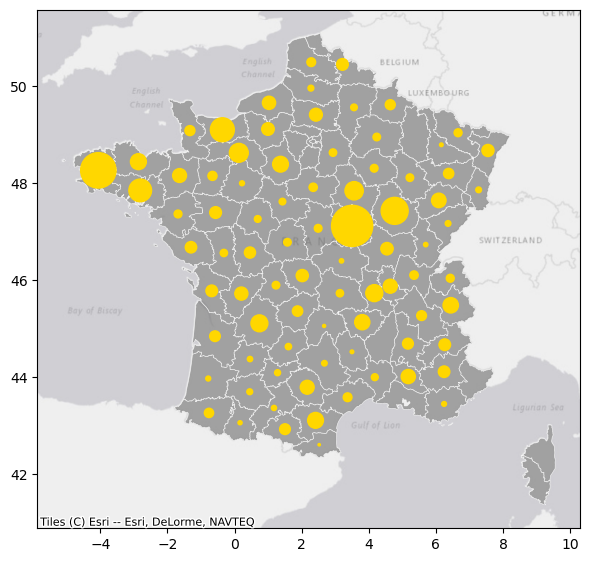

In [9]:
# Afficher un échantillon des données
fig, ax = plt.subplots(figsize=(7, 7))

# Tracer la géométrie principale
data["geometry"].plot(
    ax=ax,
    color="grey",
    edgecolor="white",  # couleur des bordures
    linewidth=0.5,  # taille des bordures
    alpha=0.7  # opacité
)

# Tracer les centroides
data["centroid_point"].plot(
    ax=ax,
    color="gold",
    markersize=data["sapin-nb-hectare"]
)

# Ajouter un fond de carte
ctx.add_basemap(
    ax, 
    crs=data.crs,
    source=ctx.providers.Esri.WorldGrayCanvas
)

# Afficher la carte
plt.show()

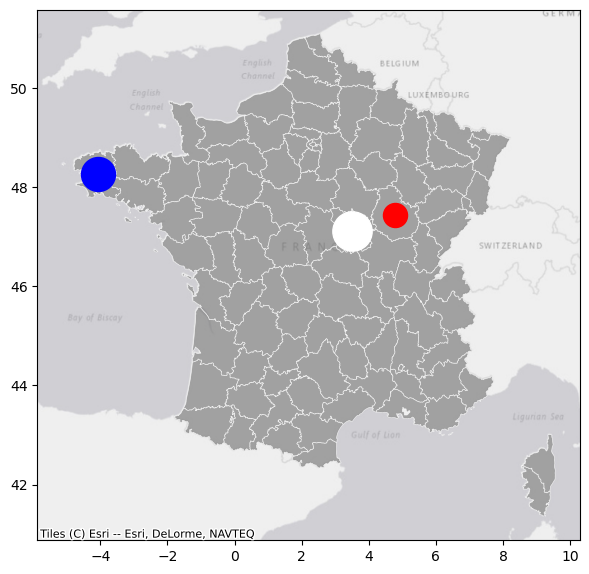

In [10]:
# Afficher un échantillon des données
fig, ax = plt.subplots(figsize=(7, 7))

# Tracer la géométrie principale
data["geometry"].plot(
    ax=ax,
    color="grey",
    edgecolor="white",  # couleur des bordures
    linewidth=0.5,  # taille des bordures
    alpha=0.7  # opacité
)

# Tracer les centroides
data[data["sapin-nb-hectare"] > 800]["centroid_point"].plot(
    ax=ax,
    color="white",
    markersize=800
)


data[(data["sapin-nb-hectare"] < 800) & (data["sapin-nb-hectare"] > 600)]["centroid_point"].plot(
    ax=ax,
    color="blue",
    markersize=600
)

data[(data["sapin-nb-hectare"] < 600) & (data["sapin-nb-hectare"] > 300)]["centroid_point"].plot(
    ax=ax,
    color="red",
    markersize=300
)

# Ajouter un fond de carte
ctx.add_basemap(
    ax, 
    crs=data.crs,
    source=ctx.providers.Esri.WorldGrayCanvas
)

# Afficher la carte
plt.show()

In [11]:
assets_folder = "Documents/geoDataScience/defi_carto_sapin_2024/assets"
file_names = os.listdir("Documents/geoDataScience/defi_carto_sapin_2024/assets")
# Dictionnaire pour stocker les marqueurs
markers = {}

# Parcours des fichiers et chargement des marqueurs
for file_name in file_names:
    if file_name.endswith(".svg"):
        # Génération du chemin complet du fichier
        file_path = os.path.join(assets_folder, file_name)
        
        # Extraction des données SVG
        path, attributes = svg2paths(file_path)
        
        # Création du marqueur et transformations
        marker = parse_path(attributes[0]['d'])
        marker.vertices -= marker.vertices.mean(axis=0)
        marker = marker.transformed(mpl.transforms.Affine2D().rotate_deg(180))
        marker = marker.transformed(mpl.transforms.Affine2D().scale(-1, 1))
        
        # Ajout du marqueur au dictionnaire
        markers[file_name] = marker

In [12]:
# Import des contour Europe
contour_europe = gpd.read_file("https://raw.githubusercontent.com/leakyMirror/map-of-europe/refs/heads/master/GeoJSON/europe.geojson")
contour_europe.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   FID        51 non-null     float64 
 1   FIPS       51 non-null     object  
 2   ISO2       51 non-null     object  
 3   ISO3       51 non-null     object  
 4   UN         51 non-null     int32   
 5   NAME       51 non-null     object  
 6   AREA       51 non-null     int32   
 7   POP2005    51 non-null     int32   
 8   REGION     51 non-null     int32   
 9   SUBREGION  51 non-null     int32   
 10  LON        51 non-null     float64 
 11  LAT        51 non-null     float64 
 12  geometry   51 non-null     geometry
dtypes: float64(3), geometry(1), int32(5), object(4)
memory usage: 4.3+ KB


## 3 - Création de la carte

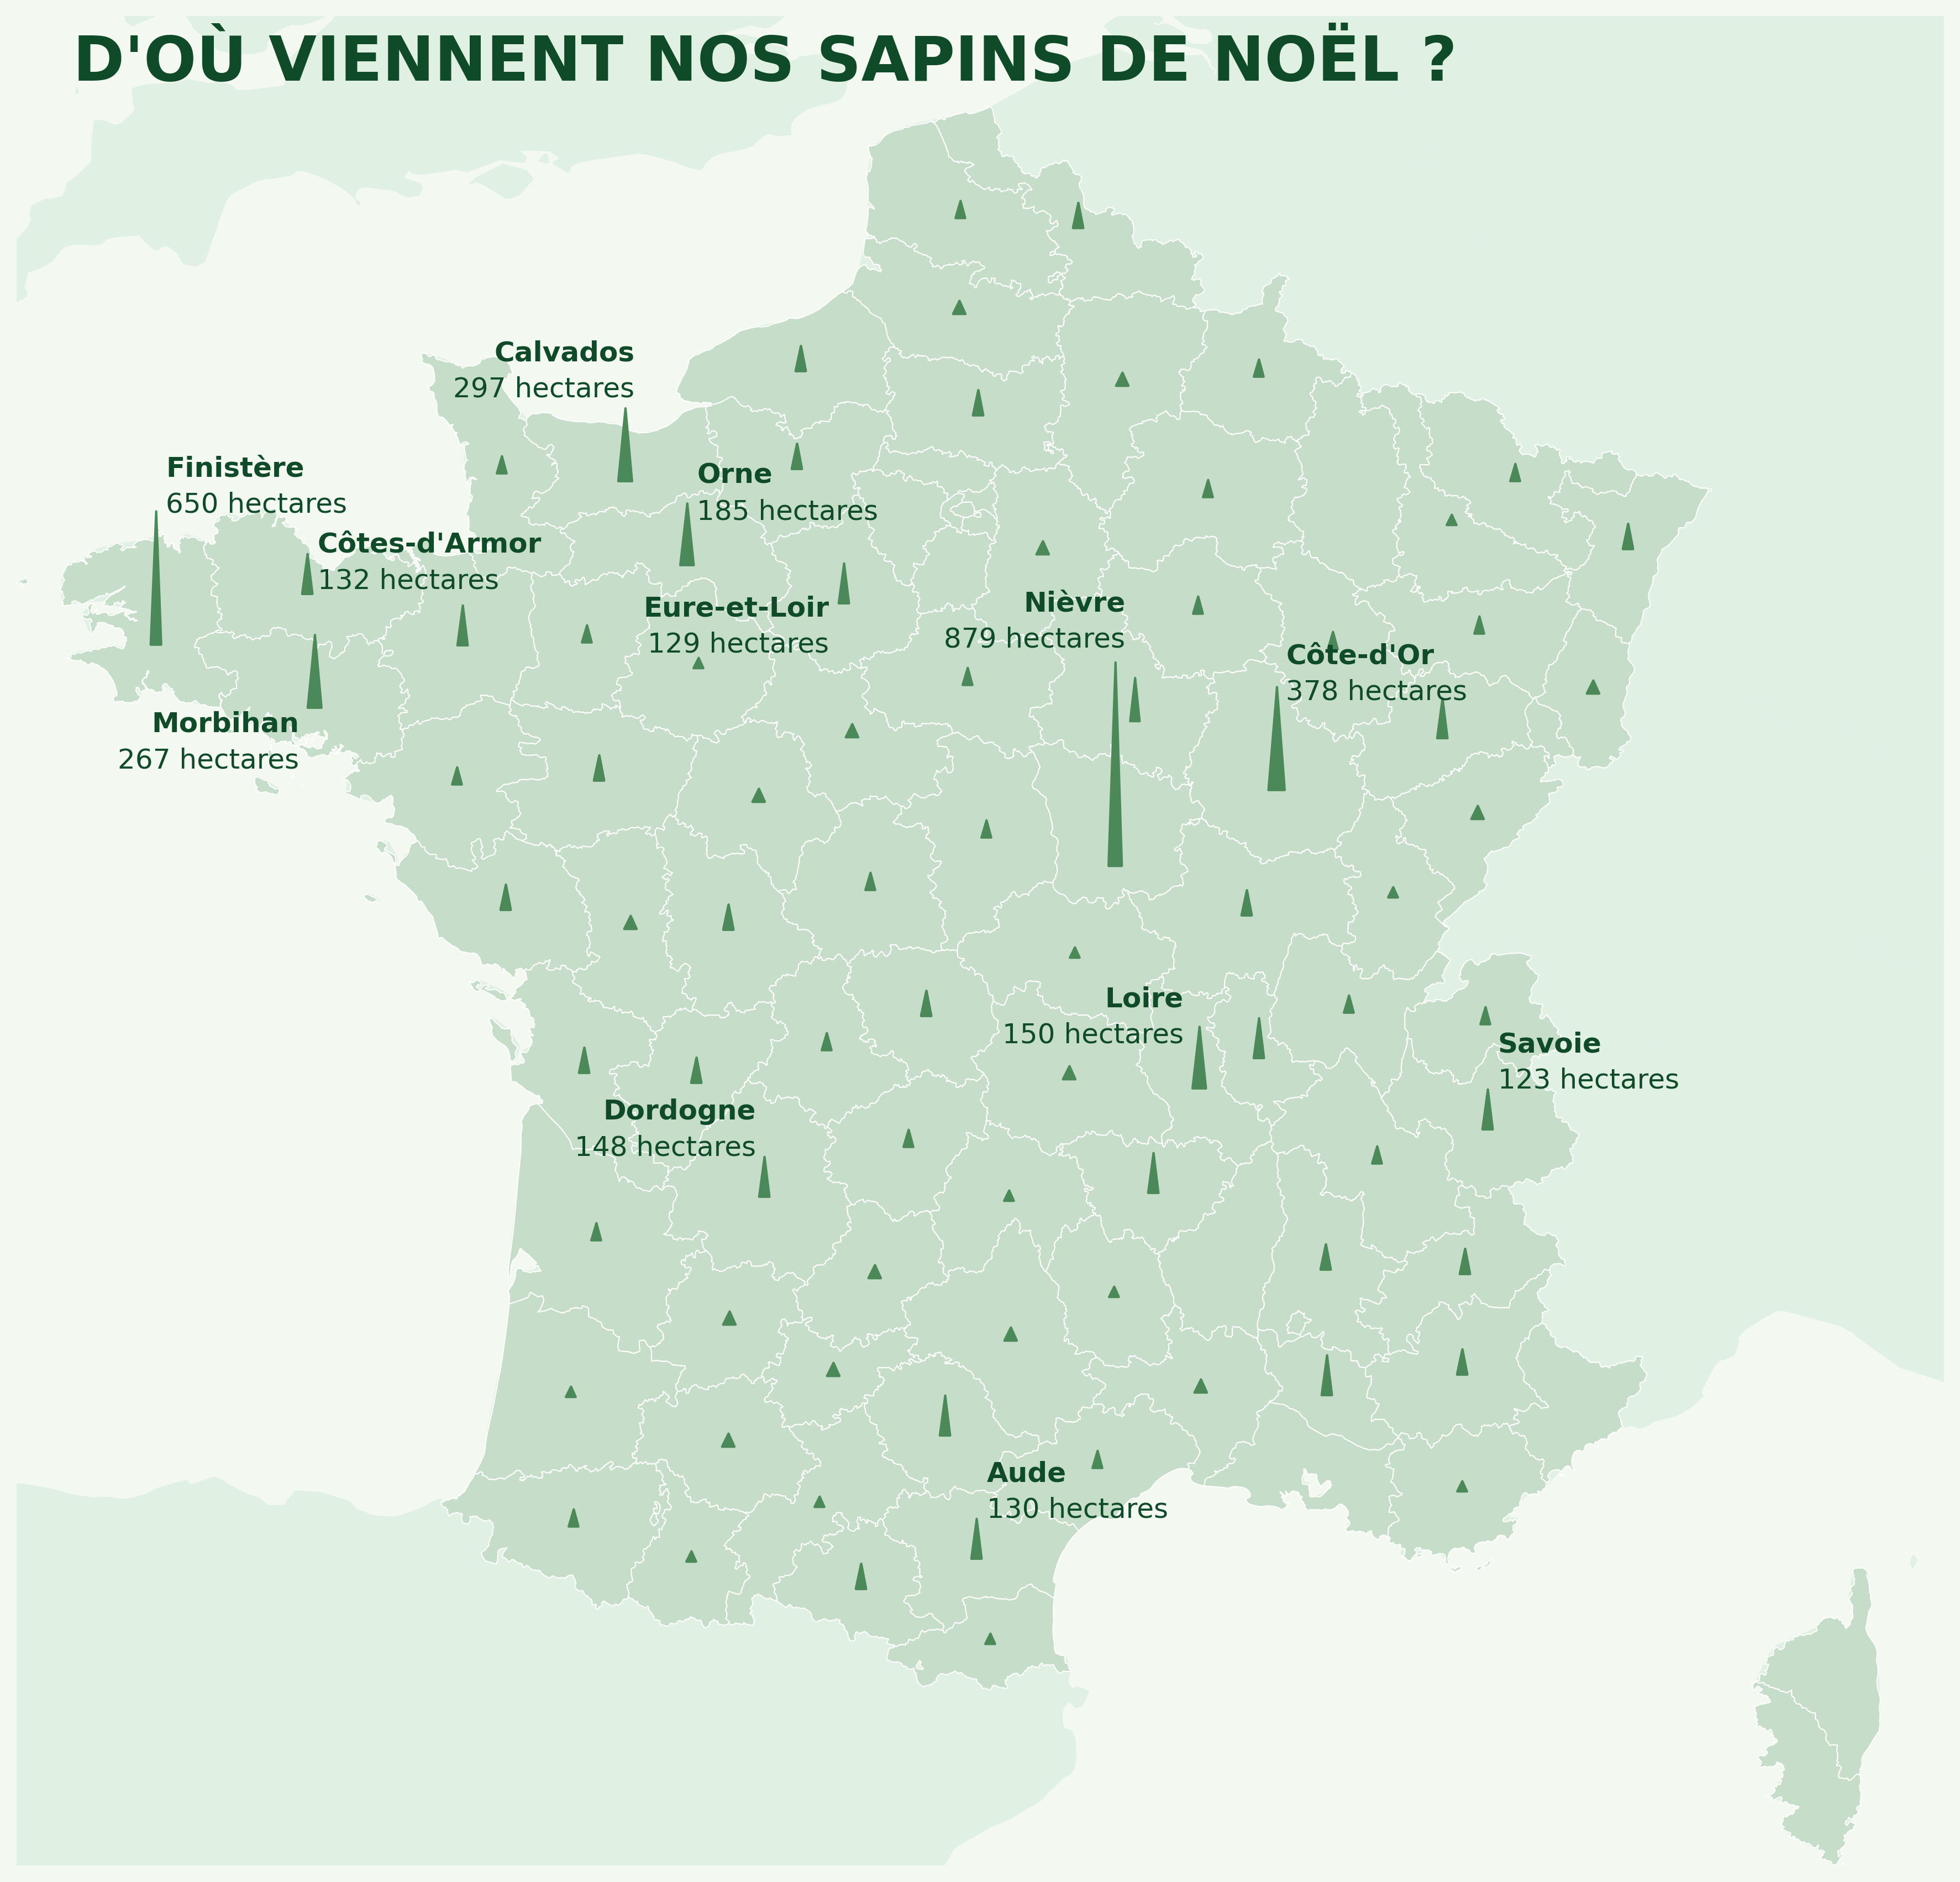

In [13]:
# Variable de couleurs
background_color = '#edf2f4'
text_color = '#14213d'
map_color = 'white'

# Création de la figure
fig, ax = plt.subplots(figsize=(10*1.5, 10*1.5), dpi=300)

# Textes de description
fig_text(
    x=0.4259, 
    y=0.86, 
    s="D'où viennent nos sapins de Noël ?".upper(),
    color="#0F4B29",
    fontsize=18 * 1.5, 
    ha='center', 
    va='top',
    weight="bold"  
)

# configuration du graphique
ax.axis('off')
ax.margins(y=0.1)
fig.patch.set_facecolor('#F3F8F1')

# Contour Europe
contour_europe.plot(
    ax=ax,
    color="#E0F0E3",
    )

# Zoomer sur une couche de carte en particulier
minx, miny, maxx, maxy = data.total_bounds # Obtenir les limites de la couche 'data'
# Définir les limites de la carte
ax.set_xlim(minx, maxx+0.5)
ax.set_ylim(miny, maxy+0.5)

# carte de la France
data.plot(
    color="#C6DDC9", # couleur remplissage
    ax=ax,
    edgecolor="white", # couleur des bordures
    linewidth=0.5, # taille des bordures
    alpha=1 # opacité
)

# Points 800
data[data["sapin-nb-hectare"] > 800]["centroid_point"].plot(
    ax=ax,
    markersize=20_000,
    marker=markers['marker_800.svg'],
    color="#4B8958"
    )

# Récupérer les coordonnées du point pour le département avec plus de 800 hectares
point = data[data["sapin-nb-hectare"] > 800]["centroid_point"].iloc[0]
x, y = point.x, point.y

# Ajouter l'annotation
ax.annotate(
    f"{data[data["sapin-nb-hectare"] > 800]["dep-nom"].values[0]}", 
    xy=(x, y),                
    xytext=(x+0.1, y+1.3),   
    color='#0F4B29',         
    fontsize=12,             
    fontweight='bold',       
    ha='right',              
    va='top',             
)

ax.annotate(
    f"{int(data[data["sapin-nb-hectare"] > 800]["sapin-nb-hectare"].values[0])} hectares", 
    xy=(x, y),                
    xytext=(x+0.1, y+1.1),   
    color='#0F4B29',         
    fontsize=12,             
    ha='right',              
    va='top',             
)

# Points 600
data[(data["sapin-nb-hectare"] >= 600) & (data["sapin-nb-hectare"] < 800)]["centroid_point"].plot(
    ax=ax,
    markersize=20_000/2.33,
    marker=markers['marker_600.svg'],
    color="#4B8958"
    )

# Récupérer les coordonnées du point pour le département avec plus de 800 hectares
point = data[(data["sapin-nb-hectare"] >= 600) & (data["sapin-nb-hectare"] < 800)]["centroid_point"].iloc[0]
x, y = point.x, point.y

# Ajouter l'annotation
ax.annotate(
    f"{data[(data["sapin-nb-hectare"] >= 600) & (data["sapin-nb-hectare"] < 800)]["dep-nom"].values[0]}", 
    xy=(x, y),                
    xytext=(x+0.1, y+0.9),   
    color='#0F4B29',         
    fontsize=12,             
    fontweight='bold',       
    ha='left',              
    va='top',             
)

ax.annotate(
    f"{int(data[(data["sapin-nb-hectare"] >= 600) & (data["sapin-nb-hectare"] < 800)]["sapin-nb-hectare"].values[0])} hectares", 
    xy=(x, y),                
    xytext=(x+0.1, y+0.7),   
    color='#0F4B29',         
    fontsize=12,             
    ha='left',              
    va='top',             
)

# Points 300
data[(data["sapin-nb-hectare"] >= 300) & (data["sapin-nb-hectare"] < 600)]["centroid_point"].plot(
    ax=ax,
    markersize=20_000/3.9,
    marker=markers['marker_300.svg'],
    color="#4B8958"
    )

# Récupérer les coordonnées du point pour le département avec plus de 800 hectares
point = data[(data["sapin-nb-hectare"] >= 300) & (data["sapin-nb-hectare"] < 600)]["centroid_point"].iloc[0]
x, y = point.x, point.y

# Ajouter l'annotation
ax.annotate(
    f"{data[(data["sapin-nb-hectare"] >= 300) & (data["sapin-nb-hectare"] < 600)]["dep-nom"].values[0]}", 
    xy=(x, y),                
    xytext=(x+0.1, y+0.7),   
    color='#0F4B29',         
    fontsize=12,             
    fontweight='bold',       
    ha='left',              
    va='top',             
)

ax.annotate(
    f"{int(data[(data["sapin-nb-hectare"] >= 300) & (data["sapin-nb-hectare"] < 600)]["sapin-nb-hectare"].values[0])} hectares", 
    xy=(x, y),                
    xytext=(x+0.1, y+0.5),   
    color='#0F4B29',         
    fontsize=12,             
    ha='left',              
    va='top',             
)

# Points 200
data[(data["sapin-nb-hectare"] >= 200) & (data["sapin-nb-hectare"] < 300)]["centroid_point"].plot(
    ax=ax,
    markersize=20_000/7.8,
    marker=markers['marker_200.svg'],
    color="#4B8958"
    )


point = data[data["dep-nom"] == "Calvados"]["centroid_point"].iloc[0]
x, y = point.x, point.y

# Ajouter l'annotation
ax.annotate(
    f"{data[data["dep-nom"] == "Calvados"]["dep-nom"].values[0]}", 
    xy=(x, y),                
    xytext=(x+0.1, y+0.7),   
    color='#0F4B29',         
    fontsize=12,             
    fontweight='bold',       
    ha='right',              
    va='top',             
)

ax.annotate(
    f"{int(data[data["dep-nom"] == "Calvados"]["sapin-nb-hectare"].values[0])} hectares", 
    xy=(x, y),                
    xytext=(x+0.1, y+0.5),   
    color='#0F4B29',         
    fontsize=12,             
    ha='right',              
    va='top',             
)

point = data[data["dep-nom"] == "Morbihan"]["centroid_point"].iloc[0]
x, y = point.x, point.y

# Ajouter l'annotation
ax.annotate(
    f"{data[data["dep-nom"] == "Morbihan"]["dep-nom"].values[0]}", 
    xy=(x, y),                
    xytext=(x-0.1, y-0.1),   
    color='#0F4B29',         
    fontsize=12,             
    fontweight='bold',       
    ha='right',              
    va='top',             
)

ax.annotate(
    f"{int(data[data["dep-nom"] == "Morbihan"]["sapin-nb-hectare"].values[0])} hectares", 
    xy=(x, y),                
    xytext=(x-0.1, y-0.3),   
    color='#0F4B29',         
    fontsize=12,             
    ha='right',              
    va='top',             
)

# Points 150
data[((data["sapin-nb-hectare"] >= 150) & (data["sapin-nb-hectare"] < 200)) & (data["dep-nom"] != "Yonne")]["centroid_point"].plot(
    ax=ax,
    markersize=20_000/10.88,
    marker=markers['marker_150.svg'],
    color="#4B8958"
)

# Spécialement pour l'Yonne
yonne_data = data[data["dep-nom"] == "Yonne"]
x_coords = yonne_data["centroid_point"].apply(lambda point: point.x)
y_coords = yonne_data["centroid_point"].apply(lambda point: point.y)

# Tracer les points
plt.plot(
    x_coords+0.1,
    y_coords-0.1,
    markersize=30,
    marker=markers['marker_150.svg'],
    color="#4B8958"
)

point = data[data["dep-nom"] == "Orne"]["centroid_point"].iloc[0]
x, y = point.x, point.y

# Ajouter l'annotation
ax.annotate(
    f"{data[data["dep-nom"] == "Orne"]["dep-nom"].values[0]}", 
    xy=(x, y),                
    xytext=(x+0.1, y+0.5),   
    color='#0F4B29',         
    fontsize=12,             
    fontweight='bold',       
    ha='left',              
    va='top',             
)

ax.annotate(
    f"{int(data[data["dep-nom"] == "Orne"]["sapin-nb-hectare"].values[0])} hectares", 
    xy=(x, y),                
    xytext=(x+0.1, y+0.3),   
    color='#0F4B29',         
    fontsize=12,             
    ha='left',              
    va='top',             
)

point = data[data["dep-nom"] == "Loire"]["centroid_point"].iloc[0]
x, y = point.x, point.y

# Ajouter l'annotation
ax.annotate(
    f"{data[data["dep-nom"] == "Loire"]["dep-nom"].values[0]}", 
    xy=(x, y),                
    xytext=(x-0.1, y+0.5),   
    color='#0F4B29',         
    fontsize=12,             
    fontweight='bold',       
    ha='right',              
    va='top',             
)

ax.annotate(
    f"{int(data[data["dep-nom"] == "Loire"]["sapin-nb-hectare"].values[0])} hectares", 
    xy=(x, y),                
    xytext=(x-0.1, y+0.3),   
    color='#0F4B29',         
    fontsize=12,             
    ha='right',              
    va='top',             
)

data[(data["sapin-nb-hectare"] >= 100) & (data["sapin-nb-hectare"] < 150)]["centroid_point"].plot(
    ax=ax,
    markersize=20_000/25.99,
    marker=markers['marker_100.svg'],
    color="#4B8958"
    )

data[(data["sapin-nb-hectare"] >= 60) & (data["sapin-nb-hectare"] < 100)]["centroid_point"].plot(
    ax=ax,
    markersize=20_000/65.99,
    marker=markers['marker_60.svg'],
    color="#4B8958"
    )

# Les points
point = data[data["dep-nom"] == "Côtes-d'Armor"]["centroid_point"].iloc[0]
x, y = point.x, point.y

# Ajouter l'annotation
ax.annotate(
    f"{data[data["dep-nom"] == "Côtes-d'Armor"]["dep-nom"].values[0]}", 
    xy=(x, y),                
    xytext=(x+0.1, y+0.3),   
    color='#0F4B29',         
    fontsize=12,             
    fontweight='bold',       
    ha='left',              
    va='top',             
)

ax.annotate(
    f"{int(data[data["dep-nom"] == "Côtes-d'Armor"]["sapin-nb-hectare"].values[0])} hectares", 
    xy=(x, y),                
    xytext=(x+0.1, y+0.1),   
    color='#0F4B29',         
    fontsize=12,             
    ha='left',              
    va='top',             
)

point = data[data["dep-nom"] == "Eure-et-Loir"]["centroid_point"].iloc[0]
x, y = point.x, point.y

# Ajouter l'annotation
ax.annotate(
    f"{data[data["dep-nom"] == "Eure-et-Loir"]["dep-nom"].values[0]}", 
    xy=(x, y),                
    xytext=(x-0.1, y-0.0),   
    color='#0F4B29',         
    fontsize=12,             
    fontweight='bold',       
    ha='right',              
    va='top',             
)

ax.annotate(
    f"{int(data[data["dep-nom"] == "Eure-et-Loir"]["sapin-nb-hectare"].values[0])} hectares", 
    xy=(x, y),                
    xytext=(x-0.1, y-0.2),   
    color='#0F4B29',         
    fontsize=12,             
    ha='right',              
    va='top',             
)

point = data[data["dep-nom"] == "Dordogne"]["centroid_point"].iloc[0]
x, y = point.x, point.y

# Ajouter l'annotation
ax.annotate(
    f"{data[data["dep-nom"] == "Dordogne"]["dep-nom"].values[0]}", 
    xy=(x, y),                
    xytext=(x-0.05, y+0.5),   
    color='#0F4B29',         
    fontsize=12,             
    fontweight='bold',       
    ha='right',              
    va='top',             
)

ax.annotate(
    f"{int(data[data["dep-nom"] == "Dordogne"]["sapin-nb-hectare"].values[0])} hectares", 
    xy=(x, y),                
    xytext=(x-0.05, y+0.3),   
    color='#0F4B29',         
    fontsize=12,             
    ha='right',              
    va='top',             
)

point = data[data["dep-nom"] == "Savoie"]["centroid_point"].iloc[0]
x, y = point.x, point.y

# Ajouter l'annotation
ax.annotate(
    f"{data[data["dep-nom"] == "Savoie"]["dep-nom"].values[0]}", 
    xy=(x, y),                
    xytext=(x+0.1, y+0.5),   
    color='#0F4B29',         
    fontsize=12,             
    fontweight='bold',       
    ha='left',              
    va='top',             
)

ax.annotate(
    f"{int(data[data["dep-nom"] == "Savoie"]["sapin-nb-hectare"].values[0])} hectares", 
    xy=(x, y),                
    xytext=(x+0.1, y+0.3),   
    color='#0F4B29',         
    fontsize=12,             
    ha='left',              
    va='top',             
)

point = data[data["dep-nom"] == "Aude"]["centroid_point"].iloc[0]
x, y = point.x, point.y

# Ajouter l'annotation
ax.annotate(
    f"{data[data["dep-nom"] == "Aude"]["dep-nom"].values[0]}", 
    xy=(x, y),                
    xytext=(x+0.1, y+0.5),   
    color='#0F4B29',         
    fontsize=12,             
    fontweight='bold',       
    ha='left',              
    va='top',             
)

ax.annotate(
    f"{int(data[data["dep-nom"] == "Aude"]["sapin-nb-hectare"].values[0])} hectares", 
    xy=(x, y),                
    xytext=(x+0.1, y+0.3),   
    color='#0F4B29',         
    fontsize=12,             
    ha='left',              
    va='top',             
)

data[(data["sapin-nb-hectare"] >= 60) & (data["sapin-nb-hectare"] < 100)]["centroid_point"].plot(
    ax=ax,
    markersize=20_000/65.99,
    marker=markers['marker_60.svg'],
    color="#4B8958"
    )

data[(data["sapin-nb-hectare"] >= 30) & (data["sapin-nb-hectare"] < 60)]["centroid_point"].plot(
    ax=ax,
    markersize=20_000/140,
    marker=markers['marker_30.svg'],
    color="#4B8958"
    )

# Le reste des données
data[(data["sapin-nb-hectare"] >= 15) & (data["sapin-nb-hectare"] < 30)]["centroid_point"].plot(
    ax=ax,
    markersize=20_000/240,
    marker=markers['marker_15.svg'],
    color="#4B8958"
    )

data[(data["sapin-nb-hectare"] > 0) & (data["sapin-nb-hectare"] < 15)]["centroid_point"].plot(
    ax=ax,
    markersize=20_000/390,
    marker=markers['marker_15.svg'],
    color="#4B8958"
    )

data[(data["sapin-nb-hectare"] == 0)]["centroid_point"].plot(
    ax=ax,
    markersize=0,
    marker=".",
    color="white"
    )


plt.show()

## 4 - Export des données

In [14]:
# Exporter en parquet
data.to_parquet("Documents/geoDataScience/defi_carto_sapin_2024/data/christmas_tree.parquet", index=False)

-- END --